In [1]:
#import all the essential libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
house=pd.read_csv("C:/Users/neeli/Downloads/upgrad/advanced_regression/train.csv",low_memory=False)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [4]:
house.shape

(1460, 81)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

####  Drop columns with ALL NaN values

In [6]:
house=house.dropna(axis=1, how='all')
house.shape


(1460, 81)

In [7]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_mode_interactivity='all'

In [8]:
# We have to drop some columns which contains large number of null values and features not important for model
drop_variables = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','MiscVal','3SsnPorch','PoolArea','Utilities']
house =house.drop(drop_variables, axis = 1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,12,2008,WD,Normal,250000


#### Replacling/Filling  the missing values with most recent value for remaining columns

In [9]:
house.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [10]:
house.BsmtQual = house.BsmtQual.fillna("Others")
house.BsmtQual.value_counts()

TA        649
Gd        618
Ex        121
Others     37
Fa         35
Name: BsmtQual, dtype: int64

In [11]:
house.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [12]:
house.BsmtCond = house.BsmtCond.fillna("Others")
house.BsmtCond.value_counts()

TA        1311
Gd          65
Fa          45
Others      37
Po           2
Name: BsmtCond, dtype: int64

In [13]:
house.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [14]:
house.BsmtExposure = house.BsmtExposure.fillna("Others")
house.BsmtExposure.value_counts()

No        953
Av        221
Gd        134
Mn        114
Others     38
Name: BsmtExposure, dtype: int64

In [15]:
house.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [16]:
house.BsmtFinType1 = house.BsmtFinType1.fillna("Others")
house.BsmtFinType1.value_counts()

Unf       430
GLQ       418
ALQ       220
BLQ       148
Rec       133
LwQ        74
Others     37
Name: BsmtFinType1, dtype: int64

In [17]:
house.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [18]:
house.BsmtFinType2 = house.BsmtFinType2.fillna("Others")
house.BsmtFinType2.value_counts()

Unf       1256
Rec         54
LwQ         46
Others      38
BLQ         33
ALQ         19
GLQ         14
Name: BsmtFinType2, dtype: int64

In [19]:
house.GarageType.value_counts()
#house[GarageType].fillna(house[GarageType].mode()[0])

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [20]:
house.GarageType = house.GarageType.fillna("Others")
house.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Others      81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [21]:
house.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

In [22]:
house.GarageYrBlt = house.GarageYrBlt.fillna("9999")
house.GarageYrBlt.value_counts()

9999      81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1965.0    21
1962.0    21
2001.0    20
1970.0    20
1996.0    20
1957.0    20
1954.0    19
1997.0    19
1978.0    19
1960.0    19
1995.0    18
1994.0    18
1974.0    18
1964.0    18
1959.0    17
1990.0    16
1963.0    16
1956.0    16
1967.0    15
1969.0    15
1979.0    15
1980.0    15
1988.0    14
1940.0    14
1920.0    14
1972.0    14
1973.0    14
1961.0    13
1971.0    13
1992.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1989.0    10
1925.0    10
1981.0    10
1985.0    10
1941.0    10
1939.0     9
1991.0     9
1975.0     9
1949.0     8
1930.0     8
1984.0     8
1983.0     7
1926.0     6
1951.0     6
1986.0     6
1916.0     5
1922.0     5
1936.0     5
1945.0     4
1946.0     4
1928.0     4
1935.0     4
1982.0     4
1931.0     4

In [23]:
house.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [24]:
house.GarageFinish = house.GarageFinish.fillna("Others")
house.GarageFinish.value_counts()

Unf       605
RFn       422
Fin       352
Others     81
Name: GarageFinish, dtype: int64

In [25]:
house.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [26]:
house.GarageQual = house.GarageQual.fillna("Others")
house.GarageQual.value_counts()

TA        1311
Others      81
Fa          48
Gd          14
Ex           3
Po           3
Name: GarageQual, dtype: int64

In [27]:
house.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [28]:
house.GarageCond = house.GarageCond.fillna("Others")
house.GarageCond.value_counts()

TA        1326
Others      81
Fa          35
Gd           9
Po           7
Ex           2
Name: GarageCond, dtype: int64

In [29]:
house.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [30]:
house.LotFrontage = house.LotFrontage.fillna("999")
house.LotFrontage.value_counts()

999      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
24.0      19
68.0      19
73.0      18
55.0      17
72.0      17
63.0      17
79.0      17
100.0     16
66.0      15
51.0      15
74.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
57.0      12
43.0      12
40.0      12
76.0      11
69.0      11
88.0      10
34.0      10
53.0      10
86.0      10
92.0      10
35.0       9
84.0       9
44.0       9
77.0       9
62.0       9
61.0       8
93.0       8
96.0       8
98.0       8
120.0      7
107.0      7
58.0       7
95.0       7
30.0       6
41.0       6
110.0      6
54.0       6
91.0       6
36.0       6
48.0       6
94.0       6
89.0       6
81.0       6
105.0      6
87.0       5
56.0       5
37.0       5
83.0       5
32.0       5
47.0       5
42.0       4
102.0      4
49.0       4
99.0       3
108.0      3
103.0      3
104.0      3
45.0       3
130.0      3

In [31]:
house.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [32]:
house.MasVnrType = house.MasVnrType.fillna("others")
house.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
others       8
Name: MasVnrType, dtype: int64

In [33]:
house.MasVnrArea.value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [34]:
house.MasVnrArea = house.MasVnrArea.fillna("0.0")
house.MasVnrArea.value_counts()

0.0       861
0.0         8
72.0        8
108.0       8
180.0       8
120.0       7
16.0        7
340.0       6
106.0       6
80.0        6
200.0       6
360.0       5
170.0       5
84.0        5
320.0       5
132.0       5
196.0       4
220.0       4
336.0       4
252.0       4
168.0       4
300.0       4
268.0       4
76.0        4
100.0       4
270.0       4
210.0       4
183.0       4
288.0       4
160.0       4
178.0       4
246.0       4
40.0        4
456.0       4
216.0       4
74.0        3
70.0        3
50.0        3
44.0        3
226.0       3
272.0       3
104.0       3
85.0        3
90.0        3
148.0       3
145.0       3
42.0        3
128.0       3
110.0       3
312.0       3
136.0       3
176.0       3
186.0       3
130.0       3
420.0       3
350.0       3
169.0       3
208.0       3
174.0       3
99.0        3
166.0       3
82.0        3
240.0       3
256.0       3
116.0       3
206.0       2
232.0       2
95.0        2
18.0        2
236.0       2
362.0       2
113.0 

In [35]:
house.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [36]:
house.Electrical = house.Electrical.fillna("Others")
house.Electrical.value_counts()

SBrkr     1334
FuseA       94
FuseF       27
FuseP        3
Mix          1
Others       1
Name: Electrical, dtype: int64

In [37]:
house.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [38]:
#GarageYrBlt can be converted in int as it cannot be floating numbers
house.GarageYrBlt = house.GarageYrBlt.apply(lambda x : int(x))
house.GarageYrBlt.value_counts()

9999    81
2005    65
2006    59
2004    53
2003    50
2007    49
1977    35
1998    31
1999    30
1976    29
2008    29
2000    27
1968    26
2002    26
1950    24
1993    22
1958    21
1966    21
2009    21
1965    21
1962    21
2001    20
1970    20
1996    20
1957    20
1954    19
1997    19
1978    19
1960    19
1995    18
1994    18
1974    18
1964    18
1959    17
1990    16
1963    16
1956    16
1967    15
1969    15
1979    15
1980    15
1988    14
1940    14
1920    14
1972    14
1973    14
1961    13
1971    13
1992    13
1955    13
1953    12
1948    11
1987    11
1989    10
1925    10
1981    10
1985    10
1941    10
1939     9
1991     9
1975     9
1949     8
1930     8
1984     8
1983     7
1926     6
1951     6
1986     6
1916     5
1922     5
1936     5
1945     4
1946     4
1928     4
1935     4
1982     4
1931     4
1910     3
2010     3
1932     3
1923     3
1952     3
1938     3
1924     3
1921     3
1947     2
1937     2
1942     2
1915     2
1918     2
1934     2

In [39]:
#LotFrontage can be converted in int as it cannot be floating numbers
house.LotFrontage = house.LotFrontage.apply(lambda x : int(x))
house.LotFrontage.value_counts()

999    259
60     143
70      70
80      69
50      57
75      53
65      44
85      40
78      25
90      23
21      23
64      19
24      19
68      19
73      18
55      17
72      17
63      17
79      17
100     16
66      15
51      15
74      15
52      14
59      13
82      12
71      12
67      12
57      12
43      12
40      12
76      11
69      11
88      10
34      10
53      10
86      10
92      10
35       9
84       9
44       9
77       9
62       9
61       8
93       8
96       8
98       8
120      7
107      7
58       7
95       7
30       6
41       6
110      6
54       6
91       6
36       6
48       6
94       6
89       6
81       6
105      6
87       5
56       5
37       5
83       5
32       5
47       5
42       4
102      4
49       4
99       3
108      3
103      3
104      3
45       3
130      3
124      2
313      2
114      2
122      2
101      2
115      2
109      2
174      2
116      2
134      2
118      2
121      2
97       2
129      2

In [40]:
# Encoding/mapping the OverallQual column

house.OverallQual = house.OverallQual.map({1:'Very Poor',2:'Poor',3:'Fair',4:'Below Average',5:'Average',6:'Above Average',7:'Good',8:'Very Good',9:'Excellent',10:'Very Excellent'})

In [41]:
# Encoding/mapping the OverallCond column

house.OverallCond = house.OverallCond.map({1:'Very Poor',2:'Poor',3:'Fair',4:'Below Average',5:'Average',6:'Above Average',7:'Good',8:'Very Good',9:'Excellent',10:'Very Excellent'})

In [42]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,12,2008,WD,Normal,250000


In [43]:
house.reset_index(inplace=True, drop=True)

In [44]:
## identifying numeric variables
numeric = house.select_dtypes(include=['float64','int64'])
numeric = numeric.columns
numeric

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

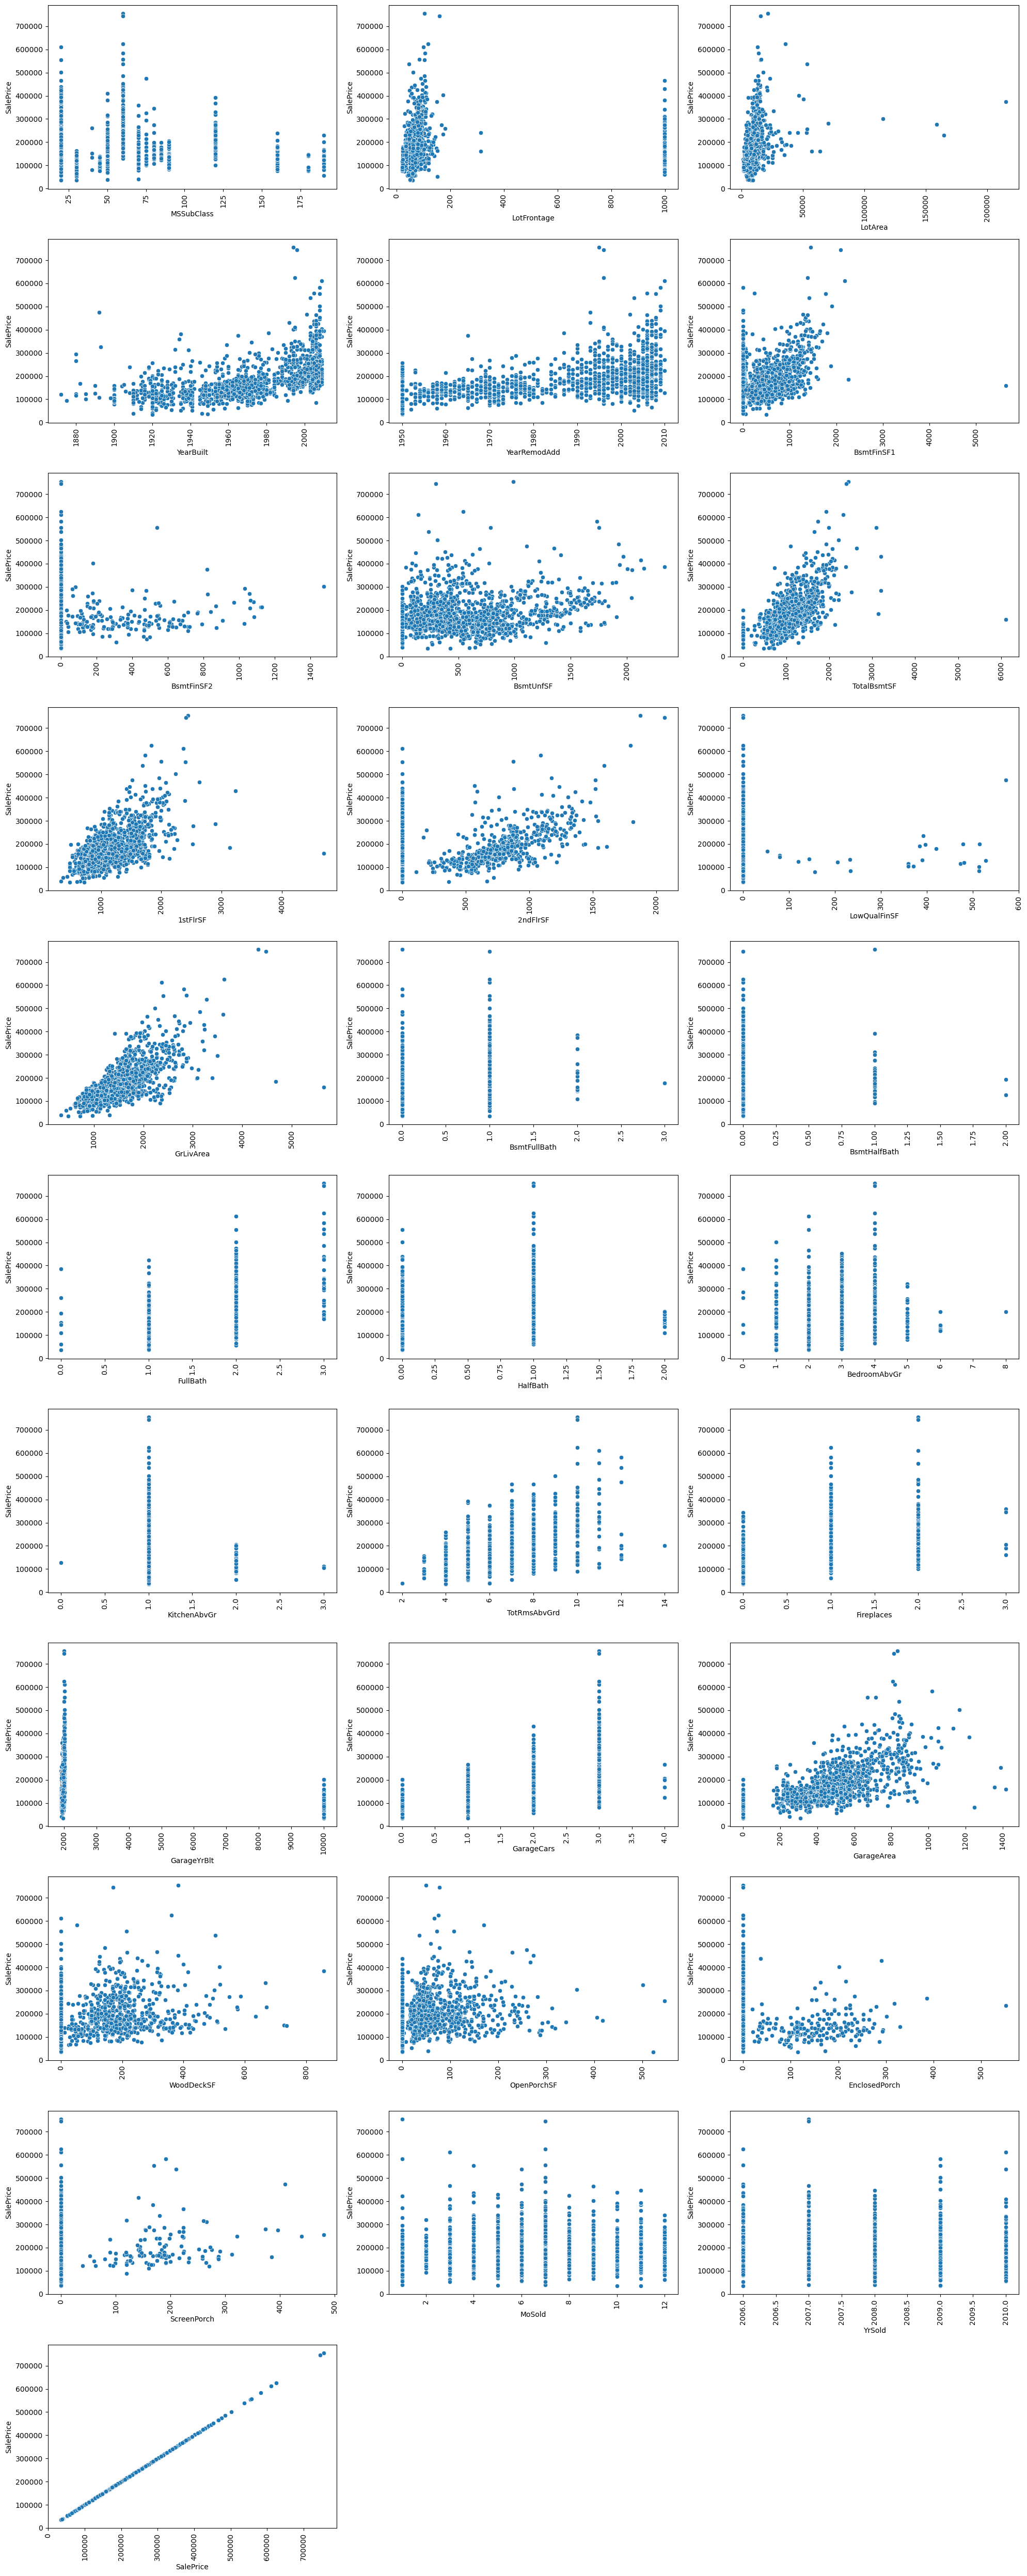

In [45]:
## making pairplots to identify trends 
plt.figure(figsize = (20,50))
i = 1
for x in numeric :
    plt.subplot(len(numeric)//3+1,3,i)
    sns.scatterplot(y='SalePrice',x=x,data=house)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()

In [46]:
house_num=house[numeric]
house_num.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,60,65,8450,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,2,2008,208500
1,20,80,9600,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,5,2007,181500
2,60,68,11250,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,9,2008,223500
3,70,60,9550,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,2,2006,140000
4,60,84,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,12,2008,250000


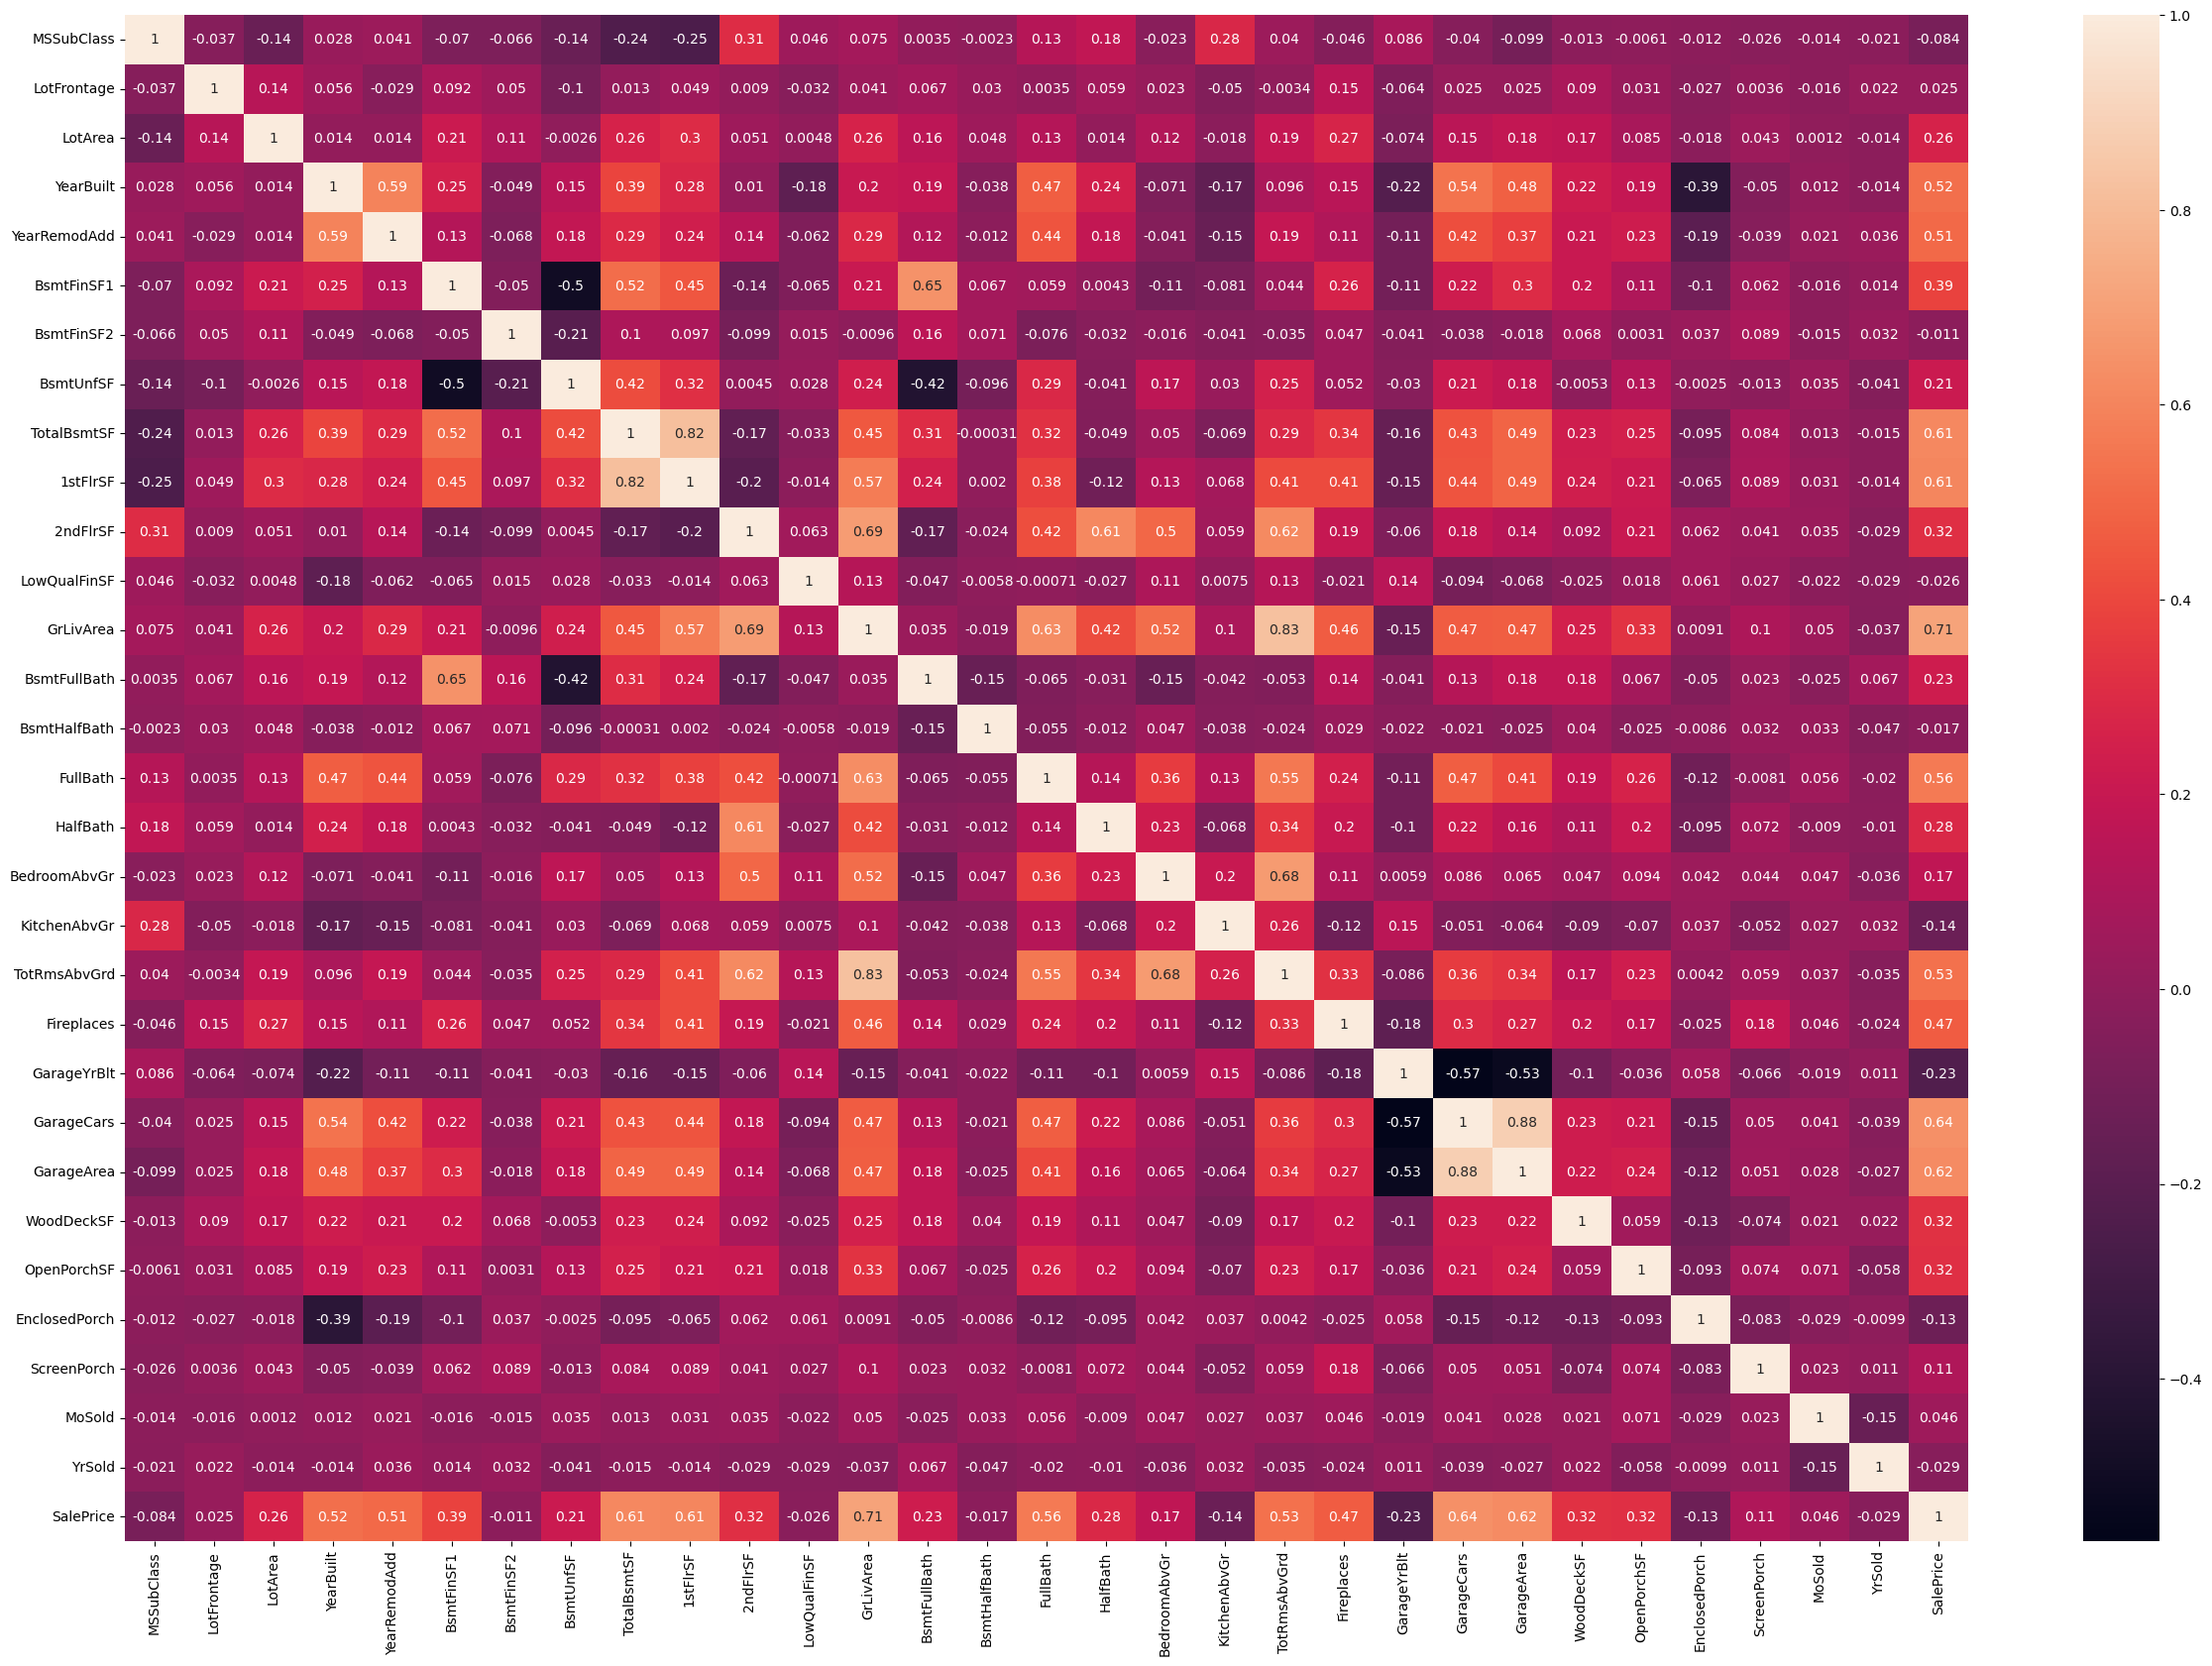

In [47]:
## finding out correlation between variable and correlation wrt to target variable
plt.figure(figsize = (30, 20))
sns.heatmap(house[numeric].corr(),annot = True)
plt.show()

##### Variables that are highly correlated with Sale Price are : OverallQual,GrLivArea, GarageArea, TotBsmtSF, 1stFlrSF,TotalRmsAbvGrd,FullBath and YearBuilt
##### GarageArea and GarageCars are highly correlated with a correlation of 0.88
##### TotRmsAbvGrd and GrLivArea are correlated to each other with a correlation of 0.83
##### 1stFlrSF and TotalBsmtSF are highly correlated with a correlation of 0.82

In [48]:
##identifying categorical variables
categorical = house.select_dtypes(include=['object'])
categorical = categorical.columns
categorical

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [49]:
house_cat=house[categorical]
house_cat=pd.concat([house_cat,house.SalePrice],axis=1)

house_cat.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000


<Figure size 1500x1500 with 0 Axes>

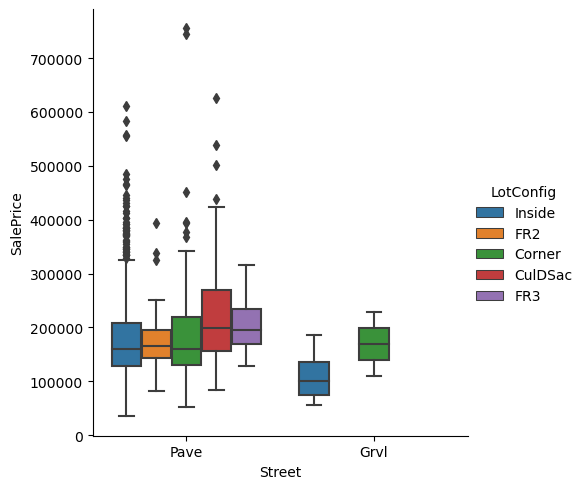

In [50]:
# comparing categorical variables, Street, LotConfig and SalePrice
plt.figure(figsize=(15,15))
sns.catplot(x="Street", y="SalePrice", hue="LotConfig",kind="box", data=house_cat)

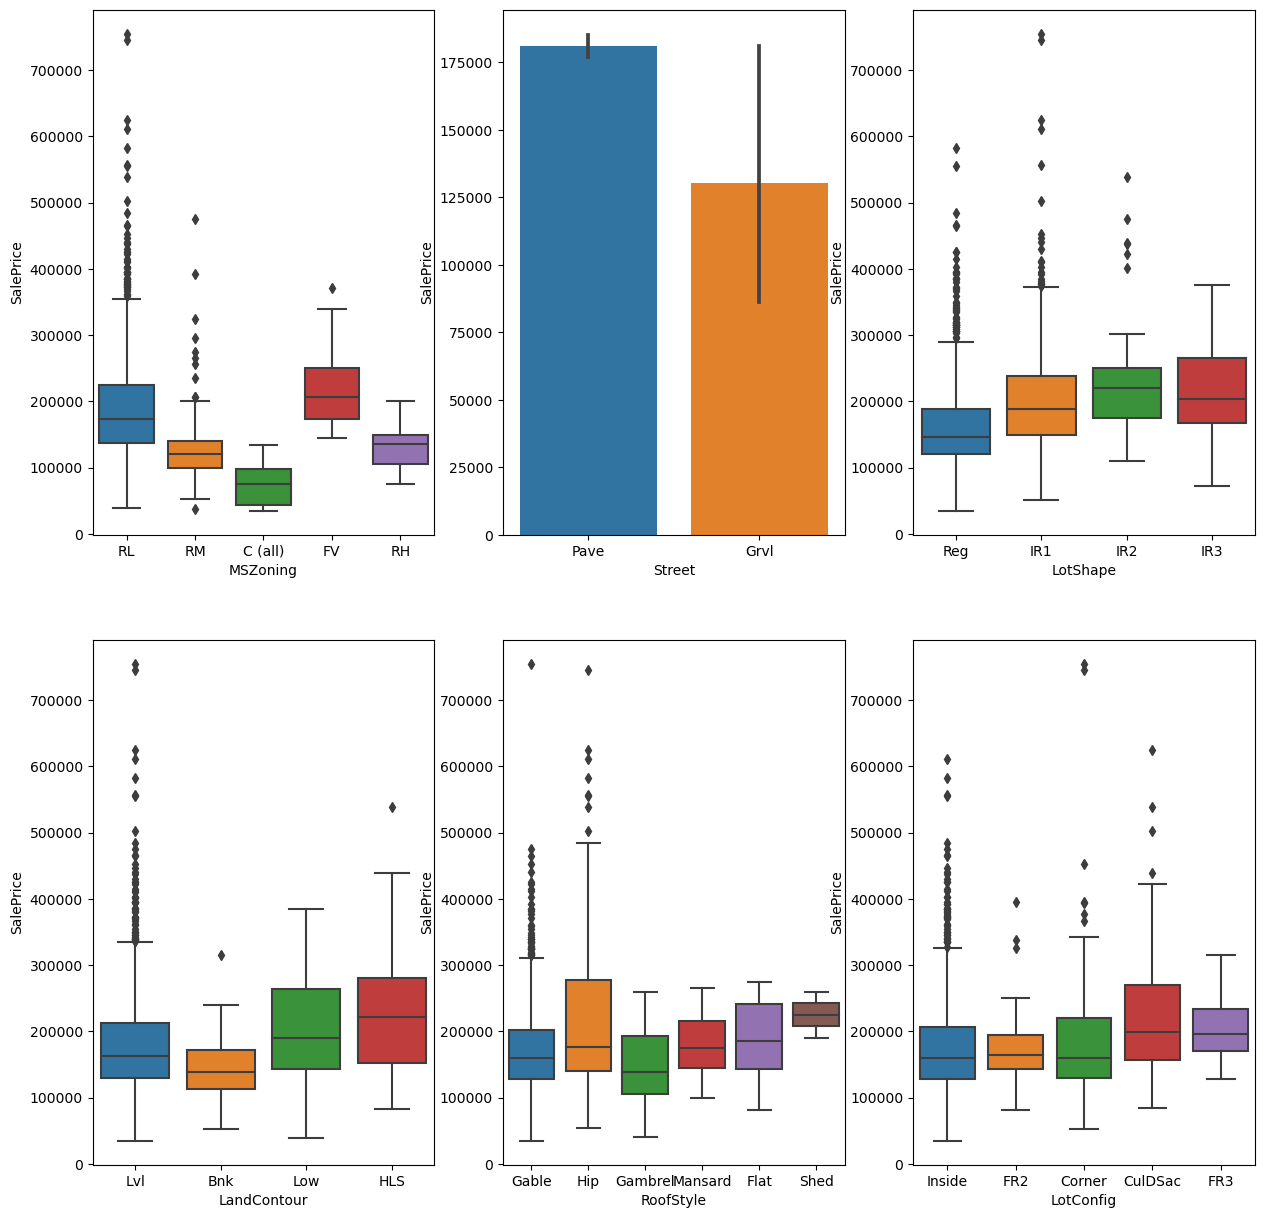

In [51]:
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.boxplot(x='MSZoning',y='SalePrice', data=house_cat)
plt.subplot(2,3,2)
sns.barplot(x='Street',y='SalePrice', data=house_cat)
plt.subplot(2,3,3)
sns.boxplot(x='LotShape',y='SalePrice', data=house_cat)
plt.subplot(2,3,4)
sns.boxplot(x='LandContour',y='SalePrice', data=house_cat)
plt.subplot(2,3,5)
sns.boxplot(x='RoofStyle',y='SalePrice', data=house_cat)
plt.subplot(2,3,6)
sns.boxplot(x='LotConfig',y='SalePrice', data=house_cat)
plt.show()

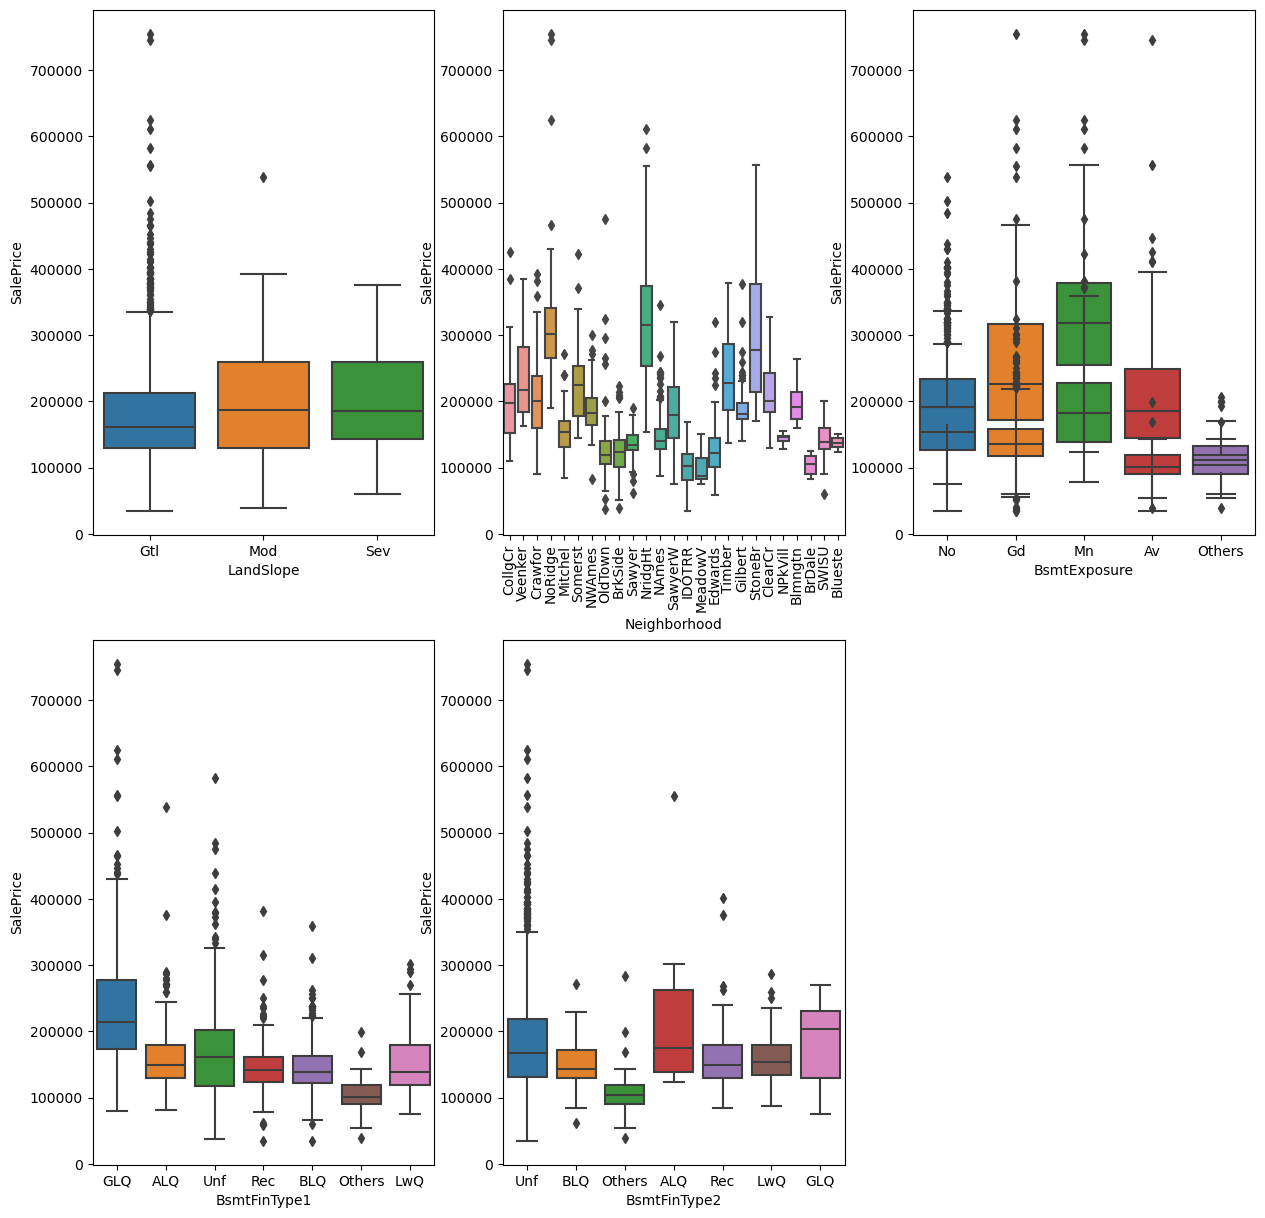

In [52]:
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.boxplot(x='LandSlope',y='SalePrice', data=house_cat)
plt.subplot(2,3,2)
sns.boxplot(x='Neighborhood',y='SalePrice', data=house_cat)
plt.xticks(rotation = 'vertical')
plt.subplot(2,3,3)
sns.boxplot(x='BsmtQual',y='SalePrice', data=house_cat)
plt.subplot(2,3,3)
sns.boxplot(x='BsmtExposure',y='SalePrice', data=house_cat)
plt.subplot(2,3,4)
sns.boxplot(x='BsmtFinType1',y='SalePrice', data=house_cat)
plt.subplot(2,3,5)
sns.boxplot(x= 'BsmtFinType2',y='SalePrice', data=house_cat) 
plt.show()

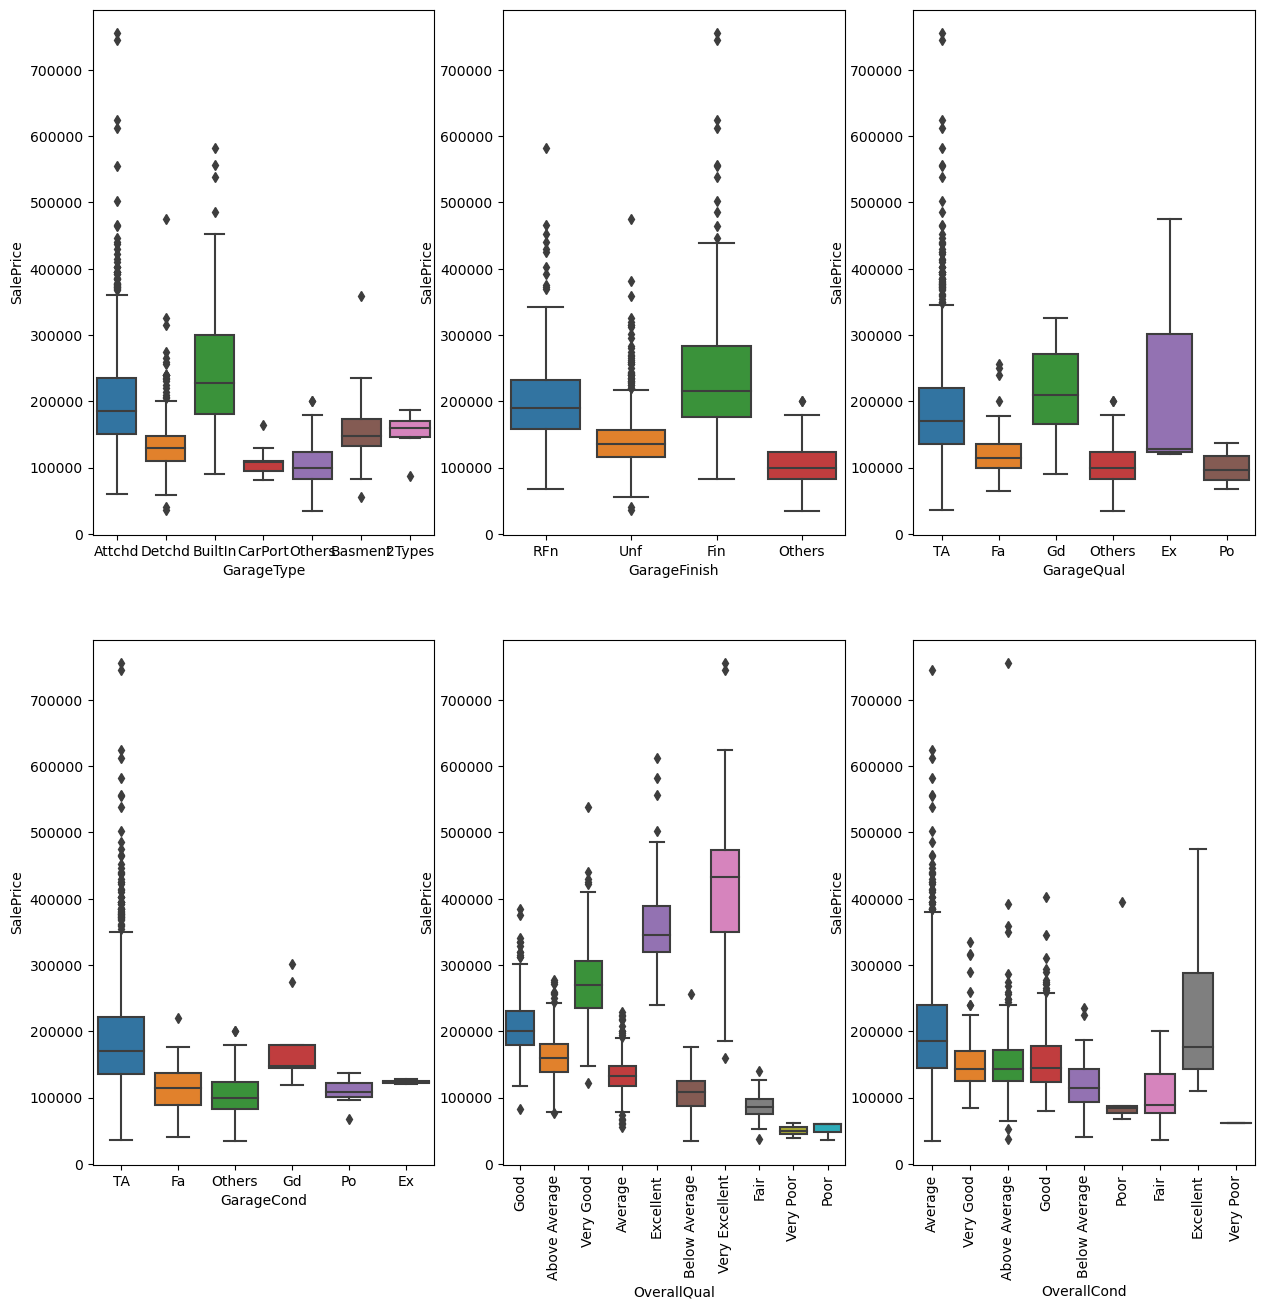

In [53]:
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
sns.boxplot(x='GarageType',y='SalePrice', data=house_cat)
plt.subplot(2,3,2)
sns.boxplot(x='GarageFinish',y='SalePrice', data=house_cat)
plt.subplot(2,3,3)
sns.boxplot(x='GarageQual',y='SalePrice', data=house_cat)
plt.subplot(2,3,4)
sns.boxplot(x='GarageCond',y='SalePrice', data=house_cat)
plt.subplot(2,3,5)
sns.boxplot(x='OverallQual',y='SalePrice', data=house_cat)
plt.xticks(rotation = 'vertical')
plt.subplot(2,3,6)
sns.boxplot(x='OverallCond',y='SalePrice', data=house_cat)
plt.xticks(rotation = 'vertical')
plt.show()

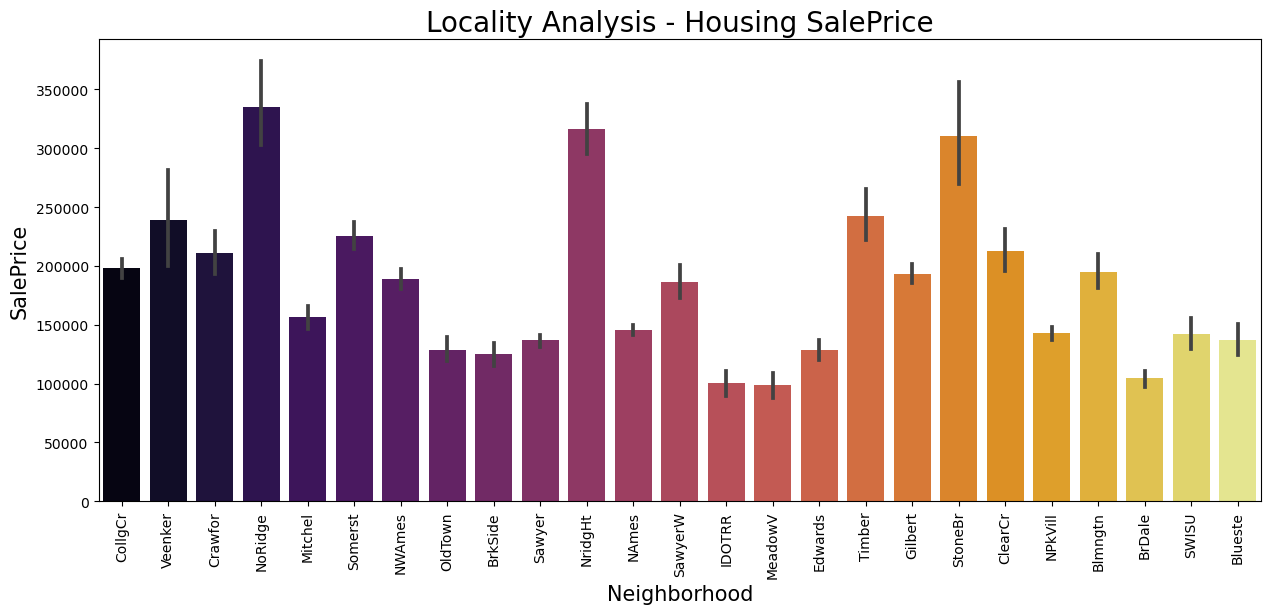

In [54]:
plt.figure(figsize=(15,6))
#sns.boxplot(x='Neighborhood',y='SalePrice', data=house_cat)
sns.barplot(x='Neighborhood', y='SalePrice', data=house_cat, palette='inferno')
plt.title("Locality Analysis - Housing SalePrice", fontsize=20)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel("SalePrice", fontsize=15);
plt.xticks(rotation = 'vertical')
plt.show()

In [55]:
#Create Dummy variable and Drop first dummy variable for each set of dummies created
house_cat1=house[categorical]
house_dummy=pd.get_dummies(house_cat1,drop_first=True)
house_dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_others,MasVnrArea_1.0,MasVnrArea_11.0,MasVnrArea_14.0,MasVnrArea_16.0,MasVnrArea_18.0,MasVnrArea_22.0,MasVnrArea_24.0,MasVnrArea_27.0,MasVnrArea_28.0,MasVnrArea_30.0,MasVnrArea_31.0,MasVnrArea_32.0,MasVnrArea_34.0,MasVnrArea_36.0,MasVnrArea_38.0,MasVnrArea_40.0,MasVnrArea_41.0,MasVnrArea_42.0,MasVnrArea_44.0,MasVnrArea_45.0,MasVnrArea_46.0,MasVnrArea_48.0,MasVnrArea_50.0,MasVnrArea_51.0,MasVnrArea_53.0,MasVnrArea_54.0,MasVnrArea_56.0,MasVnrArea_57.0,MasVnrArea_60.0,MasVnrArea_63.0,MasVnrArea_64.0,MasVnrArea_65.0,MasVnrArea_66.0,MasVnrArea_67.0,MasVnrArea_68.0,MasVnrArea_70.0,MasVnrArea_72.0,MasVnrArea_74.0,MasVnrArea_75.0,MasVnrArea_76.0,MasVnrArea_80.0,MasVnrArea_81.0,MasVnrArea_82.0,MasVnrArea_84.0,MasVnrArea_85.0,MasVnrArea_86.0,MasVnrArea_88.0,MasVnrArea_89.0,MasVnrArea_90.0,MasVnrArea_92.0,MasVnrArea_94.0,MasVnrArea_95.0,MasVnrArea_96.0,MasVnrArea_97.0,MasVnrArea_98.0,MasVnrArea_99.0,MasVnrArea_100.0,MasVnrArea_101.0,MasVnrArea_102.0,MasVnrArea_104.0,MasVnrArea_105.0,MasVnrArea_106.0,MasVnrArea_108.0,MasVnrArea_109.0,MasVnrArea_110.0,MasVnrArea_112.0,MasVnrArea_113.0,MasVnrArea_114.0,MasVnrArea_115.0,MasVnrArea_116.0,MasVnrArea_117.0,MasVnrArea_119.0,MasVnrArea_120.0,MasVnrArea_122.0,MasVnrArea_123.0,MasVnrArea_125.0,MasVnrArea_126.0,MasVnrArea_127.0,MasVnrArea_128.0,MasVnrArea_130.0,MasVnrArea_132.0,MasVnrArea_135.0,MasVnrArea_136.0,MasVnrArea_137.0,MasVnrArea_138.0,MasVnrArea_140.0,MasVnrArea_142.0,MasVnrArea_143.0,MasVnrArea_144.0,MasVnrArea_145.0,MasVnrArea_146.0,MasVnrArea_147.0,MasVnrArea_148.0,MasVnrArea_149.0,MasVnrArea_150.0,MasVnrArea_151.0,MasVnrArea_153.0,MasVnrArea_154.0,MasVnrArea_156.0,MasVnrArea_157.0,MasVnr

In [56]:
#concatinating dummy variables to house dataset
house=pd.concat([house,house_dummy],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_others,MasVnrArea_1.0,MasVnrArea_11.0,MasVnrArea_14.0,MasVnrArea_16.0,MasVnrArea_18.0,MasVnrArea_22.0,MasVnrArea_24.0,MasVnrArea_27.0,MasVnrArea_28.0,MasVnrArea_30.0,MasVnrArea_31.0,MasVnrArea_32.0,MasVnrArea_34.0,MasVnrArea_36.0,MasVnrArea_38.0,MasVnrArea_40.0,MasVnrArea_41.0,MasVnrArea_42.0,MasVnrArea_44.0,MasVnrArea_45.0,MasVnrArea_46.0,MasVnrArea_48.0,MasVnrArea_50.0,MasVnrArea_51.0,MasVnrArea_53.0,MasVnrArea_54.0,MasVnrArea_56.0,MasVnrArea_57.0,MasVnrArea_60.0,MasVnrArea_63.0,MasVnrArea_64.0,MasVnrArea_65.0,MasVnrArea_66.0,MasVnrArea_67.0,MasVnrArea_68.0,MasVnrArea_70.0,MasVnrArea_72.0,MasVnrArea_74.0,MasVnrArea_75.0,MasVnrArea_76.0,MasVnrArea_80.0,MasVnrArea_81.0,MasVnrArea_82.0,MasVnrArea_84.0,MasVnrArea_85.0,MasVnrArea_86.0,MasVnrArea_88.0,MasVnrArea_89.0,MasVnrArea_90.0,MasVnrArea_92.0,...,MasVnrArea_261.0,MasVnrArea_262.0,MasVnrArea_263.0,MasVnrArea_266.0,MasVnr

In [ ]:
#move response variable in Y
#y = house.pop('SalePrice')
#y = house['SalePrice']
#y


In [57]:
# drop categorical variables from the dataset and save as predictor variable X
house= house.drop(list(house_cat1.columns), axis=1)

In [58]:
house.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_others,MasVnrArea_1.0,MasVnrArea_11.0,MasVnrArea_14.0,MasVnrArea_16.0,MasVnrArea_18.0,MasVnrArea_22.0,MasVnrArea_24.0,MasVnrArea_27.0,MasVnrArea_28.0,MasVnrArea_30.0,MasVnrArea_31.0,MasVnrArea_32.0,MasVnrArea_34.0,MasVnrArea_36.0,MasVnrArea_38.0,MasVnrArea_40.0,MasVnrArea_41.0,MasVnrArea_42.0,MasVnrArea_44.0,MasVnrArea_45.0,MasVnrArea_46.0,MasVnrArea_48.0,MasVnrArea_50.0,MasVnrArea_51.0,MasVnrArea_53.0,MasVnrArea_54.0,MasVnrArea_56.0,MasVnrArea_57.0,MasVnrArea_60.0,MasVnrArea_63.0,MasVnrArea_64.0,MasVnrArea_65.0,MasVnrArea_66.0,MasVnrArea_67.0,MasVnrArea_68.0,MasVnrArea_70.0,MasVnrArea_72.0,MasVnrArea_74.0,MasVnrArea_75.0,MasVnrArea_76.0,MasVnrArea_80.0,MasVnrArea_81.0,MasVnrArea_82.0,MasVnrArea_84.0,MasVnrArea_85.0,MasVnrArea_86.0,MasVnrArea_88.0,MasVnrArea_89.0,MasVnrArea_90.0,MasVnrArea_92.0,MasVnrArea_94.0,MasVnrArea_95.0,MasVnrArea_96.0,MasVnrArea_97.0,MasVnrArea_98.0,MasVnrArea_99.0,MasVnrArea_100.0,MasVnrArea_101.0,MasVnrArea_102.0,MasVnrArea_104.0,MasVnrArea_105.0,MasVnrArea_106.0,MasVnrArea_108.0,MasVnrArea_109.0,MasVnrArea_110.0,MasVnrArea_112.0,MasVnrArea_113.0,MasVnrArea_114.0,MasVnrArea_115.0,MasVnrArea_116.0,MasVnrArea_117.0,MasVnrArea_119.0,MasVnrArea_120.0,MasVnrArea_122.0,MasVnrArea_123.0,MasVnrArea_125.0,MasVnrArea_126.0,MasVnrArea_127.0,MasVnrArea_128.0,MasVnrArea_130.0,MasVnr

In [ ]:
#Feature Scaling
#from sklearn.preprocessing import scale

#cols = house.columns
#house = pd.DataFrame(scale(house))
#house.columns = cols
#house.columns

In [59]:
house.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_others,MasVnrArea_1.0,MasVnrArea_11.0,MasVnrArea_14.0,MasVnrArea_16.0,MasVnrArea_18.0,MasVnrArea_22.0,MasVnrArea_24.0,MasVnrArea_27.0,MasVnrArea_28.0,MasVnrArea_30.0,MasVnrArea_31.0,MasVnrArea_32.0,MasVnrArea_34.0,MasVnrArea_36.0,MasVnrArea_38.0,MasVnrArea_40.0,MasVnrArea_41.0,MasVnrArea_42.0,MasVnrArea_44.0,MasVnrArea_45.0,MasVnrArea_46.0,MasVnrArea_48.0,MasVnrArea_50.0,MasVnrArea_51.0,MasVnrArea_53.0,MasVnrArea_54.0,MasVnrArea_56.0,MasVnrArea_57.0,MasVnrArea_60.0,MasVnrArea_63.0,MasVnrArea_64.0,MasVnrArea_65.0,MasVnrArea_66.0,MasVnrArea_67.0,MasVnrArea_68.0,MasVnrArea_70.0,MasVnrArea_72.0,MasVnrArea_74.0,MasVnrArea_75.0,MasVnrArea_76.0,MasVnrArea_80.0,MasVnrArea_81.0,MasVnrArea_82.0,MasVnrArea_84.0,MasVnrArea_85.0,MasVnrArea_86.0,MasVnrArea_88.0,MasVnrArea_89.0,MasVnrArea_90.0,MasVnrArea_92.0,MasVnrArea_94.0,MasVnrArea_95.0,MasVnrArea_96.0,MasVnrArea_97.0,MasVnrArea_98.0,MasVnrArea_99.0,MasVnrArea_100.0,MasVnrArea_101.0,MasVnrArea_102.0,MasVnrArea_104.0,MasVnrArea_105.0,MasVnrArea_106.0,MasVnrArea_108.0,MasVnrArea_109.0,MasVnrArea_110.0,MasVnrArea_112.0,MasVnrArea_113.0,MasVnrArea_114.0,MasVnrArea_115.0,MasVnrArea_116.0,MasVnrArea_117.0,MasVnrArea_119.0,MasVnrArea_120.0,MasVnrArea_122.0,MasVnrArea_123.0,MasVnrArea_125.0,MasVnrArea_126.0,MasVnrArea_127.0,MasVnrArea_128.0,MasVnrArea_130.0,MasVnr

#### Linear Model

In [60]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(house, train_size = 0.7, random_state = 100)


In [61]:
# Using MinMaxScaler to Rescaling the features
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

# Apply scaler() to all the numeric variables

cols = house.columns

df_train[cols] = scaler.fit_transform(df_train[cols])
df_train.head()

df_test[cols] = scaler.fit_transform(df_test[cols])
df_test.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_others,MasVnrArea_1.0,MasVnrArea_11.0,MasVnrArea_14.0,MasVnrArea_16.0,MasVnrArea_18.0,MasVnrArea_22.0,MasVnrArea_24.0,MasVnrArea_27.0,MasVnrArea_28.0,MasVnrArea_30.0,MasVnrArea_31.0,MasVnrArea_32.0,MasVnrArea_34.0,MasVnrArea_36.0,MasVnrArea_38.0,MasVnrArea_40.0,MasVnrArea_41.0,MasVnrArea_42.0,MasVnrArea_44.0,MasVnrArea_45.0,MasVnrArea_46.0,MasVnrArea_48.0,MasVnrArea_50.0,MasVnrArea_51.0,MasVnrArea_53.0,MasVnrArea_54.0,MasVnrArea_56.0,MasVnrArea_57.0,MasVnrArea_60.0,MasVnrArea_63.0,MasVnrArea_64.0,MasVnrArea_65.0,MasVnrArea_66.0,MasVnrArea_67.0,MasVnrArea_68.0,MasVnrArea_70.0,MasVnrArea_72.0,MasVnrArea_74.0,MasVnrArea_75.0,MasVnrArea_76.0,MasVnrArea_80.0,MasVnrArea_81.0,MasVnrArea_82.0,MasVnrArea_84.0,MasVnrArea_85.0,MasVnrArea_86.0,MasVnrArea_88.0,MasVnrArea_89.0,MasVnrArea_90.0,MasVnrArea_92.0,MasVnrArea_94.0,MasVnrArea_95.0,MasVnrArea_96.0,MasVnrArea_97.0,MasVnrArea_98.0,MasVnrArea_99.0,MasVnrArea_100.0,MasVnrArea_101.0,MasVnrArea_102.0,MasVnrArea_104.0,MasVnrArea_105.0,MasVnrArea_106.0,MasVnrArea_108.0,MasVnrArea_109.0,MasVnrArea_110.0,MasVnrArea_112.0,MasVnrArea_113.0,MasVnrArea_114.0,MasVnrArea_115.0,MasVnrArea_116.0,MasVnrArea_117.0,MasVnrArea_119.0,MasVnrArea_120.0,MasVnrArea_122.0,MasVnrArea_123.0,MasVnrArea_125.0,MasVnrArea_126.0,MasVnrArea_127.0,MasVnrArea_128.0,MasVnrArea_130.0,MasVnr

In [ ]:
# check the correlation coefficients to see which variables are highly correlated
#plt.figure(figsize=(26,10))
#sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
#plt.show()

In [62]:
# Building the Linear Model

y_train = df_train.pop('SalePrice')
X_train = df_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 318 to 792
Columns: 580 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(580)
memory usage: 4.5 MB


In [63]:

# Instantiate linear regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [64]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-136498787.1534381
[ 2.21181363e-02 -3.52303183e-03  1.87576752e-01  8.99474883e-02
  7.56417680e-03 -2.87001410e+10 -7.49539473e+09 -1.18787260e+10
  3.10697841e+10  4.93370597e+09  2.35835714e+09  5.88161707e+08
 -5.94328840e+09  7.23731518e-03 -2.71725655e-03  9.20093060e-03
 -6.09683990e-03  5.46932220e-04 -4.91399765e-02 -1.40342712e-02
  9.57107544e-03 -1.25841141e-01  1.89898610e-02  3.81019115e-02
  4.43220139e-03  2.32722759e-02  7.23433495e-03  6.98029995e-03
 -3.68833542e-03 -1.45626068e-03  5.39767742e-02  5.93581200e-02
  5.39445877e-02  4.38976288e-02  5.14616966e-02  5.08356094e-03
  1.02962554e-02  3.31497192e-03 -3.40127945e-03 -4.89759445e-03
 -7.51733780e-04  1.17702484e-02 -1.06053352e-02 -4.13579941e-02
 -2.41184235e-03  9.83083248e-03 -2.35120654e-02  2.73072720e-02
 -2.55036354e-03  3.07047367e-02  1.40681267e-02  8.11386108e-03
  5.80053329e-02  4.44841385e-03  1.63578987e-02  2.68915892e-02
 -9.41991806e-03 -9.43708420e-03  1.10441446e-02  1.45289898e-02
  8.75

In [65]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_test = df_test.pop('SalePrice')
X_test = df_test
X_test.info()

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train: ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test: ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 1436 to 210
Columns: 580 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(580)
memory usage: 1.9 MB
r2 train:  0.9760925723603698
r2 test:  -1.1004040265698408e+21
rss1:  0.2942349532826057
rss2:  9.445524790500267e+21
MSE train:  0.00028818310801430525
MSE test:  2.151600180068398e+19


#### There is huge difference in the r2-score value of both train and test data.This essentially indicates overfitting and lets handle using Ridge regression

### Ridge and Lasso Regression

#### Ridge Regression

In [66]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  

ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)
#print(ridge_model_cv.best_score_)

{'alpha': 4.0}


In [68]:
alpha = 8.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-2.28663776e-02, -6.91662328e-04,  2.07680063e-02,  1.02584651e-02,
        1.54824229e-02,  1.65027654e-02,  8.74645678e-03,  2.17719085e-02,
        2.56780791e-02,  4.61943350e-02,  6.33012119e-02, -4.32530780e-03,
        6.30378548e-02,  2.45662324e-02,  8.69932446e-04,  4.22569803e-02,
        1.31372992e-02,  1.16986878e-02, -1.28912927e-02,  3.87970492e-02,
        2.94510935e-02,  5.04026433e-04,  3.86814369e-02,  2.44661482e-02,
        1.80509637e-02,  3.40588659e-03,  2.67971589e-03,  7.11137153e-03,
       -2.94218587e-03, -5.30816795e-03,  8.13459181e-03,  7.79330819e-03,
        1.06689142e-02,  3.77832283e-03,  2.66435773e-03,  5.97828154e-03,
       -9.06436018e-03, -7.87541677e-04,  1.13940051e-02,  1.33706185e-02,
        1.58560903e-02,  1.43915780e-02, -1.44449771e-02, -3.04965148e-03,
       -3.11704611e-03,  7.90845501e-03,  4.86382832e-03, -2.04064834e-03,
       -2.11436459e-03, -2.20098392e-03,  5.05169098e-03, -8.34281819e-03,
        2.82835313e-02, -

In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9036061132555637
0.8514215321203961
1.1863447289478755
1.2753512053804492
0.0011619439069029142
0.0029051280304793832


#### R2-score value is low in the test dataset when compared to train dataset

#### Lasso Regression

In [70]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
print(lasso_model_cv.best_params_)
#print(lasso_model_cv.best_score_)

{'alpha': 0.0001}


In [72]:
alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [73]:
lasso.coef_

array([-3.04698308e-02, -0.00000000e+00,  1.42929136e-02,  3.76884767e-02,
        1.70576154e-02,  1.36232721e-03,  0.00000000e+00, -0.00000000e+00,
        5.09463585e-02,  0.00000000e+00,  6.09205731e-03, -9.42822685e-03,
        3.71060853e-01,  2.75109539e-02,  0.00000000e+00,  1.46155125e-02,
        0.00000000e+00, -0.00000000e+00, -1.16791183e-02,  0.00000000e+00,
        2.45556925e-02, -0.00000000e+00,  4.56972887e-02,  1.57178432e-03,
        4.77247048e-03,  0.00000000e+00, -0.00000000e+00,  2.12151464e-03,
       -1.24783241e-03, -1.09169736e-03,  0.00000000e+00,  0.00000000e+00,
        7.46707025e-03, -0.00000000e+00,  0.00000000e+00,  8.67001604e-04,
        0.00000000e+00, -4.46942430e-04,  0.00000000e+00,  5.27502016e-03,
        5.75977184e-03,  1.30996077e-02, -1.89179261e-03, -0.00000000e+00,
       -5.72516063e-06,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  6.95332402e-04,  5.80934108e-03, -0.00000000e+00,
        3.25617252e-02, -

In [74]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9227696953401989
0.8241552658206163
0.9504935213485601
1.5093963270452295
0.0009309437035735163
0.003438260426071138


#### R2-score of Lasso  is better than Ridge . There were less noisy variables in the model

In [75]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.760926e-01,0.903606,0.922770
1,R2 Score (Test),-1.100404e+21,0.851422,0.824155
2,RSS (Train),2.942350e-01,1.186345,0.950494
3,RSS (Test),9.445525e+21,1.275351,1.509396
4,MSE (Train),1.697596e-02,0.034087,0.030511
5,MSE (Test),4.638534e+09,0.053899,0.058637


#### Changes in Coefficients

In [76]:
betas = pd.DataFrame(index=X_train.columns)

In [77]:
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

C:\Users\neeli\AppData\Local\Temp\ipykernel_28412\407224533.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


In [78]:
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,2.211814e-02,-0.022866,-0.030470
LotFrontage,-3.523032e-03,-0.000692,-0.000000
LotArea,1.875768e-01,0.020768,0.014293
YearBuilt,8.994749e-02,0.010258,0.037688
YearRemodAdd,7.564177e-03,0.015482,0.017058
BsmtFinSF1,-2.870014e+10,0.016503,0.001362
BsmtFinSF2,-7.495395e+09,0.008746,0.000000
BsmtUnfSF,-1.187873e+10,0.021772,-0.000000
TotalBsmtSF,3.106978e+10,0.025678,0.050946
1stFlrSF,4.933706e+09,0.046194,0.000000


#### the variables GrLivArea, OverallQual, OverallCond, TotalBsmtSF, GarageArea are having high coefficient values. The higher the coefficient the important the predictor hence these variables are impacting the Housing SalePrice more

In [81]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

betas['Ridge'].sort_values(ascending=False)

OverallQual_Very Excellent    0.067865
2ndFlrSF                      0.063301
GrLivArea                     0.063038
Neighborhood_NoRidge          0.057155
OverallQual_Excellent         0.054396
                                ...   
MasVnrArea_762.0             -0.031615
Condition2_PosN              -0.031615
BsmtQual_TA                  -0.031817
BsmtQual_Gd                  -0.034634
MasVnrArea_796.0             -0.043604
Name: Ridge, Length: 580, dtype: float64

In [82]:
betas['Lasso'].sort_values(ascending=False)

GrLivArea                     0.371061
OverallQual_Very Excellent    0.142994
OverallQual_Excellent         0.092373
RoofMatl_WdShngl              0.055494
TotalBsmtSF                   0.050946
                                ...   
BsmtQual_Gd                  -0.021773
MSSubClass                   -0.030470
MasVnrArea_762.0             -0.126183
Condition2_PosN              -0.147457
MasVnrArea_796.0             -0.421923
Name: Lasso, Length: 580, dtype: float64